<a href="https://colab.research.google.com/github/nich02/AccountFraud/blob/main/STAC_v_Xarray_Assignment_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step One
Install the required libraries

In [ ]:
!pip install shapely
!pip install pystac-client
!pip install rioxarray
!pip install ipython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 33.4 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


# Step Two

Import the required libraries

In [ ]:
from pystac_client import Client
import rioxarray
from shapely.geometry import Point
from IPython.display import Image


# Step Two

Prepare `earth search` API url, the required `sentinel-2-l2a` collection, region of interest and time period

In [ ]:
stac_api_url = "https://earth-search.aws.element84.com/v1"
collection = "sentinel-2-l2a"
point = Point(40.300576712378245, -0.4129712274018118)
start_date = '2024-01-15'
end_date = '2024-01-31'

# Step Three

Open the STAC Catalog and Search for STAC Items using `pystac-client` library

In [ ]:
client = Client.open(stac_api_url)

search_results = client.search(
    collections=[collection],
    intersects=point,
    datetime=[start_date,end_date],
    query=["eo:cloud_cover<10"]
)

# Step Four

Inspect the STAC Items
- Count the number of items
- List their IDs
- View metadata of the first item

In [ ]:
# Count number of items
print("No. of Items : ", len(list(search_results.items())))

No. of Items :  1


In [ ]:
# List their IDs
for item in search_results.items():
    print(item.id)

S2B_37MFV_20240115_0_L2A


In [ ]:
# Get the first STAC item
first_search_results_item = list(search_results.items())[0]

In [ ]:
# Get Datetime
print("Datetime : ", first_search_results_item.datetime)

Datetime :  2024-01-15 07:50:01.359000+00:00


In [ ]:
# Get Geometry
print("Geometry : ", first_search_results_item.geometry)

Geometry :  {'type': 'Polygon', 'coordinates': [[[39.89864664584343, -9.046193405388268e-06], [39.89878080340665, -0.9932619785593303], [40.885349440552105, -0.9928437233471619], [40.885068178590316, -9.04238448685357e-06], [39.89864664584343, -9.046193405388268e-06]]]}


In [ ]:
# Get Properties
print("Properties : ", first_search_results_item.properties)

Properties :  {'created': '2024-01-17T04:24:00.630Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 0.003155, 'proj:epsg': 32737, 'mgrs:utm_zone': 37, 'mgrs:latitude_band': 'M', 'mgrs:grid_square': 'FV', 'grid:code': 'MGRS-37MFV', 'view:sun_azimuth': 132.608524006922, 'view:sun_elevation': 58.4564865355312, 's2:degraded_msi_data_percentage': 0.0104, 's2:nodata_pixel_percentage': 0, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0, 's2:cloud_shadow_percentage': 0.000431, 's2:vegetation_percentage': 55.393255, 's2:not_vegetated_percentage': 44.294676, 's2:water_percentage': 0.258788, 's2:unclassified_percentage': 0.049691, 's2:medium_proba_clouds_percentage': 0.00061, 's2:high_proba_clouds_percentage': 4e-05, 's2:thin_cirrus_percentage': 0.002505, 's2:snow_ice_percentage': 0, 's2:product_type': 'S2MSI2A', 's2:processing_baseline': '05.10', 's2:product_uri': 'S2B_MSIL2A_20240115T073149_N0510_R049_T37MFV_20

In [ ]:
# Get Assets
print("Assets : ", first_search_results_item.assets)

Assets :  {'aot': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/AOT.tif>, 'blue': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/B02.tif>, 'coastal': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/B01.tif>, 'granule_metadata': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/granule_metadata.xml>, 'green': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/B03.tif>, 'nir': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/B08.tif>, 'nir08': <Asset href=https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_202401

In [ ]:
# Get Asset Names
print("Assets Names : ", first_search_results_item.assets.keys())

Assets Names :  dict_keys(['aot', 'blue', 'coastal', 'granule_metadata', 'green', 'nir', 'nir08', 'nir09', 'red', 'rededge1', 'rededge2', 'rededge3', 'scl', 'swir16', 'swir22', 'thumbnail', 'tileinfo_metadata', 'visual', 'wvp', 'aot-jp2', 'blue-jp2', 'coastal-jp2', 'green-jp2', 'nir-jp2', 'nir08-jp2', 'nir09-jp2', 'red-jp2', 'rededge1-jp2', 'rededge2-jp2', 'rededge3-jp2', 'scl-jp2', 'swir16-jp2', 'swir22-jp2', 'visual-jp2', 'wvp-jp2'])


# Step Five

Inspecting STAC assets for the first STAC Item and using `Rioxarray` to read and compute band math.

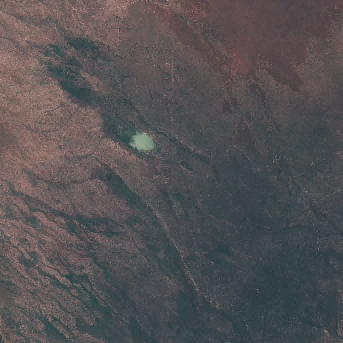

In [ ]:
# Display thumbnail of the region
thumbnail = first_search_results_item.assets["thumbnail"].href
Image(thumbnail)


In [ ]:
# Get HREF of NIR and RED bands
nir_href = first_search_results_item.assets["nir"].href
red_href = first_search_results_item.assets["red"].href
print("NIR Asset HREF: ", nir_href)
print("RED Asset HREF: ", red_href)

NIR Asset HREF:  https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/B08.tif
RED Asset HREF:  https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/37/M/FV/2024/1/S2B_37MFV_20240115_0_L2A/B04.tif


In [ ]:
# Use Rioxarray to read the bands
nir = rioxarray.open_rasterio(nir_href, masked=True)
red = rioxarray.open_rasterio(red_href, masked=True)

# Clip to a smaller region for faster operation
smaller_roi = (633955.1600,9942611.4293,644961.5136,9951111.4018)
nir = nir.rio.clip_box(*smaller_roi)
red = red.rio.clip_box(*smaller_roi)

nir

<xarray.DataArray (band: 1, y: 851, x: 1102)> Size: 4MB
[937802 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 9kB 6.34e+05 6.34e+05 ... 6.45e+05 6.45e+05
  * y            (y) float64 7kB 9.951e+06 9.951e+06 ... 9.943e+06 9.943e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    scale_factor:        1.0
    add_offset:          0.0

In [ ]:
# Get some properies for NIR asset
print("NIR Resolution", nir.rio.resolution())
print("NIR CRS", nir.rio.crs)
print("NIR Bounds", nir.rio.bounds())
print("NIR Width", nir.rio.width)
print("NIR Height", nir.rio.height)

NIR Resolution (10.0, -10.0)
NIR CRS EPSG:32737
NIR Bounds (633950.0, 9942610.0, 644970.0, 9951120.0)
NIR Width 1102
NIR Height 851


In [ ]:
# Get some properies for RED asset
print("RED Resolution", red.rio.resolution())
print("RED CRS", red.rio.crs)
print("RED Bounds", red.rio.bounds())
print("RED Width", red.rio.width)
print("RED Height", red.rio.height)

RED Resolution (10.0, -10.0)
RED CRS EPSG:32737
RED Bounds (633950.0, 9942610.0, 644970.0, 9951120.0)
RED Width 1102
RED Height 851


In [ ]:
# Calculate NDVI
ndvi = (nir - red)/ (nir + red)
ndvi

<xarray.DataArray (band: 1, y: 851, x: 1102)> Size: 4MB
array([[[0.30831558, 0.27645874, 0.39330143, ..., 0.4322748 ,
         0.47841945, 0.54814583],
        [0.30980393, 0.31957772, 0.44407532, ..., 0.43726236,
         0.4445474 , 0.50435865],
        [0.3256125 , 0.352552  , 0.4460242 , ..., 0.4082019 ,
         0.48356208, 0.5323511 ],
        ...,
        [0.6040353 , 0.588944  , 0.5255084 , ..., 0.20917174,
         0.23863056, 0.30994824],
        [0.6411215 , 0.62528217, 0.5440484 , ..., 0.2116926 ,
         0.21452145, 0.33593315],
        [0.6395802 , 0.6286243 , 0.57016206, ..., 0.2179009 ,
         0.20265152, 0.27796447]]], dtype=float32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 9kB 6.34e+05 6.34e+05 ... 6.45e+05 6.45e+05
  * y            (y) float64 7kB 9.951e+06 9.951e+06 ... 9.943e+06 9.943e+06
    spatial_ref  int64 8B 0

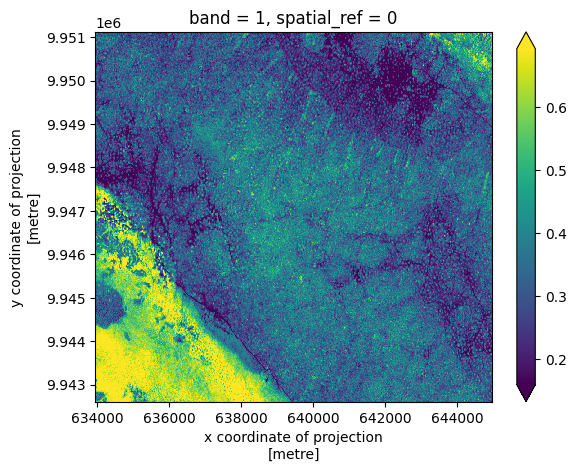

In [ ]:
# Plot the NDVI
ndvi.plot(robust=True, cmap="viridis")

In [ ]:
# Get NDVI Mean on region
print(ndvi.mean())

<xarray.DataArray ()> Size: 4B
array(0.35791883, dtype=float32)
Coordinates:
    spatial_ref  int64 8B 0
